# tdsm encoder
Here provides the interface of interacting with function in `util` to perform the training & sampling of generative model. 

## import model

In [1]:
import time, functools, torch, os,sys, random, fnmatch, psutil
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import util.dataset_structure, util.display, util.model
import tqdm

## Parameter setting

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
padding_value = -20

dataset = "toy_model"
dataset_store_path = "/eos/user/t/tihsu/database/ML_hackthon/toy_model"

## Pad data (Optional)

In [6]:
files_list_ = []
for filename in os.listdir(dataset_store_path):
    if fnmatch.fnmatch(filename, '*' + dataset + '*.pt'):
        files_list_.append(os.path.join(dataset_store_path, filename))
        
tqdm_file = tqdm.notebook.trange(len(files_list_))
os.system("mkdir -p samples")
for index in tqdm_file:
    file_name = files_list_[index]
    data = util.dataset_structure.cloud_dataset(file_name, device=device)
    data.padding()
    data.save(os.path.join("samples", (file_name.split('/')[-1]).replace('no_pedding','padding')))

  0%|          | 0/1 [00:00<?, ?it/s]

/eos/home-i00/t/tihsu/SWAN_projects/ML_hackathon/tdsm_encoder/util/dataset_structure.py:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



## Plot data distribution (Optional)

/eos/home-i00/t/tihsu/SWAN_projects/ML_hackathon/tdsm_encoder/util/dataset_structure.py:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



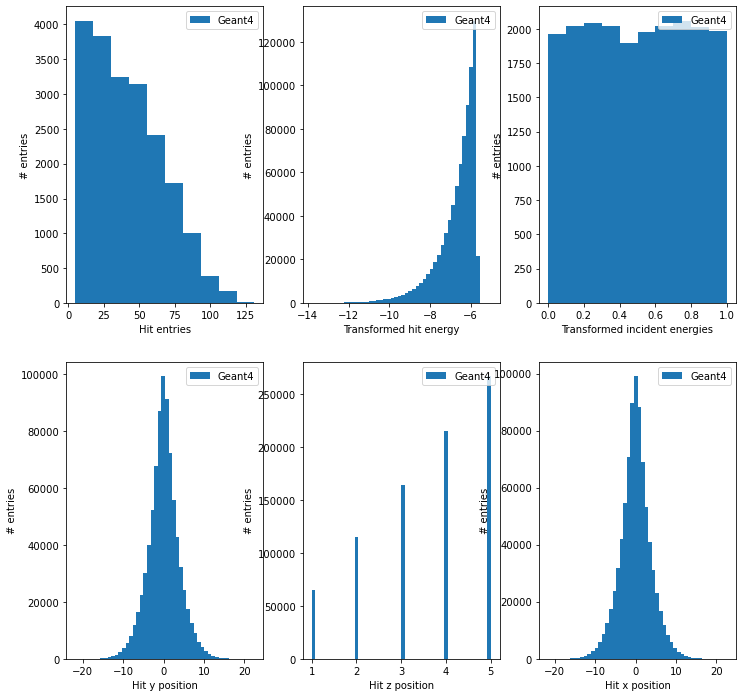

In [6]:
plot_file_name = "samples/toy_model.pt"
custom_data = util.dataset_structure.cloud_dataset(plot_file_name,device=device, transform=util.dataset_structure.rescale_energies(), transform_y=util.dataset_structure.rescale_conditional())
point_clouds_loader = DataLoader(custom_data, batch_size=150, shuffle=False)
fig = util.display.plot_distribution(point_clouds_loader, label="Geant4")
fig.show()

## Training

### Training parameter

In [3]:
batch_size = 150
lr = 0.0001
n_epochs = 200
workingdir = "./"
batch_size = 150
train_ratio = 0.9

sigma = 25.0
vesde = util.dataset_structure.VESDE(device=device)
new_marginal_prob_std_fn = functools.partial(vesde.marginal_prob)
new_diffusion_coeff_fn   = functools.partial(vesde.sde)

print('torch version: ', torch.__version__)
print('Running on device: ', device)
if torch.cuda.is_available():
    print('Cuda used to build pyTorch: ',torch.version.cuda)
    print('Current device: ', torch.cuda.current_device())
    print('Cuda arch list: ', torch.cuda.get_arch_list())

print('Working directory: ', workingdir)

files_list_ = []
for filename in os.listdir('samples'):
    if fnmatch.fnmatch(filename, '*' + dataset + '*.pt'):
        files_list_.append(os.path.join('samples', filename))
print(files_list_)
        
model = util.model.Gen(4, 64, 128, 6, 1, 0, marginal_prob_std=new_marginal_prob_std_fn)
print('model: ', model)

torch version:  1.11.0a0+gitbc2c6ed
Running on device:  cuda
Cuda used to build pyTorch:  11.7
Current device:  0
Cuda arch list:  ['sm_37', 'sm_50', 'sm_60', 'sm_61', 'sm_70', 'sm_75', 'compute_37']
Working directory:  ./
['samples/toy_model.pt']
Initial GaussianFourierProjection W weights: Parameter containing:
tensor([ 40.7784, -30.9428, -14.1236,  16.7031,   7.4489,  -8.0177,   6.9538,
         -3.4520,  63.2173, -37.2169,  12.2676,  10.4475, -39.0449, -45.4823,
         -8.4069, -28.1072,  12.3318,  25.7942,  14.6806,   2.5417,  21.1615,
         -2.4662, -67.5205,  14.5094,  60.7322,  27.7837,  -1.9903,  -8.6972,
        -28.4267,  -1.5673,  19.6056,  11.3475])
Initial Dense weights: Parameter containing:
tensor([[ 0.1053,  0.0582, -0.0529, -0.0920,  0.0982,  0.0476,  0.0027, -0.0730,
         -0.0204, -0.0297, -0.0582,  0.1046, -0.1181,  0.0631, -0.0876, -0.1228,
          0.0609,  0.0744, -0.0826,  0.0359,  0.0743, -0.0311,  0.0075, -0.0399,
         -0.0796,  0.0944,  0.0317, 

### Start to train!!

Output directory:  training_result/training_64embeddim_16_attheads_12_encoder_blocks_20230420_2026_output/


  0%|          | 0/200 [00:00<?, ?it/s]

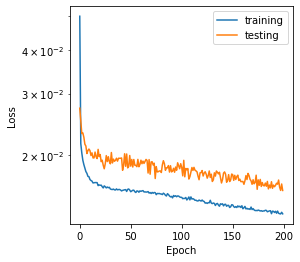

20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 

20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 18000 showers
20000 showers in file
train_dataset: 18000 showers, batch size: 

Gen(
  (embed): Linear(in_features=4, out_features=64, bias=True)
  (embed_t): Sequential(
    (0): GaussianFourierProjection()
    (1): Linear(in_features=64, out_features=64, bias=True)
  )
  (dense1): Dense(
    (dense): Linear(in_features=64, out_features=1, bias=True)
  )
  (encoder): ModuleList(
    (0): Block(
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
      )
      (dropout): Dropout(p=0, inplace=False)
      (fc1): Linear(in_features=64, out_features=128, bias=True)
      (fc2): Linear(in_features=128, out_features=64, bias=True)
      (fc1_cls): Linear(in_features=64, out_features=128, bias=True)
      (fc2_cls): Linear(in_features=128, out_features=64, bias=True)
      (act): GELU()
      (act_dropout): Dropout(p=0, inplace=False)
    )
    (1): Block(
      (attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=64, out_features=64, bias=True)
      )
 

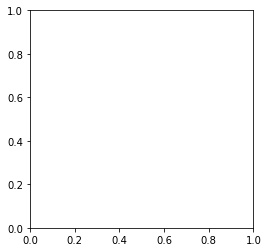

In [11]:
util.model.training(batch_size = batch_size,
                    lr = lr,
                    n_epochs = n_epochs,
                    model = model,
                    new_marginal_prob_std_fn = new_marginal_prob_std_fn,
                    device = device,
                    jupyternotebook = True,
                    files_list = files_list_,
                    train_ratio = train_ratio,
                    mask=True, padding_value=padding_value)

## Sampling 

In [7]:
hits_energies = torch.rand(20000)*200
sample, in_energies, nhits = util.model.generate_sample(model=model,
                                                        marginal_prob_std=new_marginal_prob_std_fn, 
                                                        diffusion_coeff=new_diffusion_coeff_fn,
                                                        sample_batch_size=1000,
                                                        n_bin=200,
                                                        load_name = "training_result/training_64embeddim_16_attheads_12_encoder_blocks_20230420_2026_output/ckpt_tmp_199.pth",
                                                        device=device,
                                                        in_energies=hits_energies,
                                                        sampled_file_list=["samples/toy_model.pt"],
                                                        mask=True, 
                                                        jupyternotebook=True,
                                                        label = 'dim64_layer6_masking')

output_directory: sampling/dim64_layer6_masking


/eos/home-i00/t/tihsu/SWAN_projects/ML_hackathon/tdsm_encoder/util/dataset_structure.py:10: UserWarning:

To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).



Progress: 1/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 2/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 3/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 4/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 5/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 6/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 7/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 8/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 9/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 10/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 11/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 12/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 13/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 14/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 15/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 16/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 17/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 18/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 19/20

  0%|          | 0/100 [00:00<?, ?it/s]

Progress: 20/20

  0%|          | 0/100 [00:00<?, ?it/s]

## Draw Generative Distribution

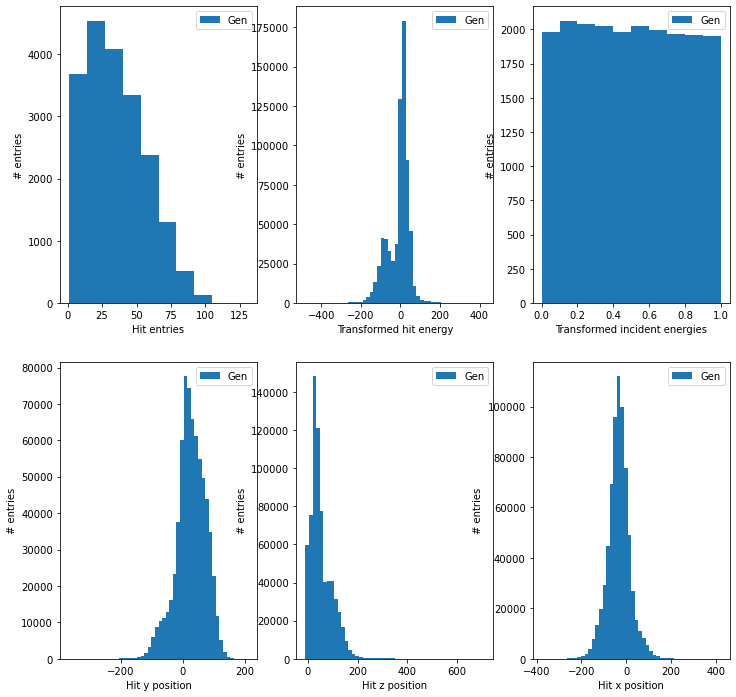

In [8]:
plot_file_name = "sampling/dim64_layer6_masking/sample.pt"
custom_data = util.dataset_structure.cloud_dataset(plot_file_name,device=device, transform_y=util.dataset_structure.rescale_conditional())
custom_data.padding()
point_clouds_loader = DataLoader(custom_data, batch_size=150, shuffle=False)
fig = util.display.plot_distribution(point_clouds_loader, label="Gen")
fig.show()